## IDX2016B - Week 2 presentations
### ***Classifiers in machine learning - which should I choose and how do I use it?***
#### Kyle Willett
#### 14 June 2016

In [1]:
%matplotlib inline

# Setup - import some packages we'll need

import numpy as np
import matplotlib.pyplot as plt

### Logistic regression

Logistic regression is a method of fitting a regression model based on one dependent variable (DV) and one or more independent variables (IVs). The difference between logistic and linear regression is that logistic regression predicts results of **discrete** categories, meaning that $y | x$ is the result of a Bernoulli distribution rather than a Gaussian. Linear regression is more appropriate if the dependent variable is continuous. 

Advantages of logistic regression:

* does **not** assume statistical independence of your IV(s)
* does **not** assume a normal distribution of DV
* returns a probabilistic interpretation as the model
* model can be quickly updated (using gradient descent, for example)
* assumes boundaries are linear, but do not have to be parallel to the IV axes
* quite fast

Disadvantages of logistic regression:

* does not predict continuous data
* requires more data to get reasonable fit
* assuming a single continuous boundary means that it does not handle local structure well

In [2]:
from sklearn import datasets

# Import some data to fit. We'll use the iris data and fit only to the first two features.
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target
n_classes = len(set(Y))

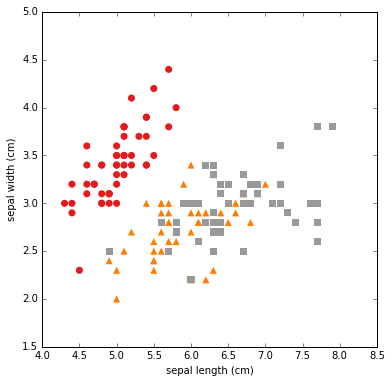

In [3]:
# Plot the training data and take a look at the classes

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

md = {0:'o',1:'^',2:'s'}
cm = plt.cm.Set1
for i in range(n_classes):
    inds = (Y==i)
    ax.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=plt.cm.Set1,marker=md[i],s=50)

ax.set_xlabel(iris['feature_names'][0])
ax.set_ylabel(iris['feature_names'][1]);

In [4]:
# Train the logistic regression model

h = 0.02  # step size in the mesh

# Create an instance of the classifier
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

# Fit the data with the classifier
logreg.fit(X, Y)

# Create a 2D grid to evaluate the classifier on
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Evaluate the classifier at every point in the grid
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the output so that it can be overplotted on our grid
Z = Z.reshape(xx.shape)

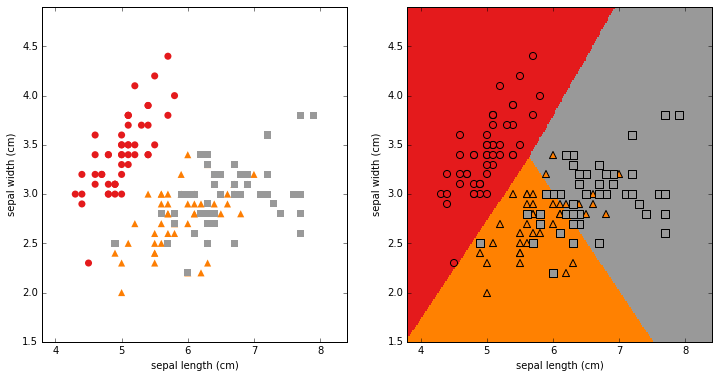

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the training points
for i in range(n_classes):
    inds = (Y==i)
    ax1.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=plt.cm.Set1,marker=md[i],s=50)


# Plot the classifier with the training points on top
ax2.pcolormesh(xx, yy, Z, cmap=cm)
for i in range(n_classes):
    inds = (Y==i)
    ax2.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=cm,marker=md[i],s=50,edgecolor='k')

# Label the axes and remove the ticks
for ax in (ax1,ax2):
    ax.set_xlabel(iris['feature_names'][0])
    ax.set_ylabel(iris['feature_names'][1])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max());

So, now you have a predictor for the class of any future object based on the input data (length and width of sepals). For example:

In [6]:
length = 6.0
width = 3.2

# Just the discrete answer
data = np.array([width,length]).reshape(1,-1)
pred_class = logreg.predict(data)[0]
target_name = iris['target_names'][pred_class]
print "Overall predicted class of the new flower is {0:}.\n".format(target_name)

# Probabilities for all the classes
pred_probs = logreg.predict_proba(data)
for name,prob in zip(iris['target_names'],pred_probs[0]):
    print "\tProbability of class {0:12} is {1:.2f}%.".format(name,prob*100.)

Overall predicted class of the new flower is setosa.

	Probability of class setosa       is 99.99%.
	Probability of class versicolor   is 0.00%.
	Probability of class virginica    is 0.00%.


### Decision trees

Decision trees are a non-parametric, supervised method for learning both classification and regression. It works by creating series of increasingly deeper rules for separating the independent variables based on combinations of the dependent variables. Rules can include simple thresholds on the DVs, Gini coefficient, cross-entropy, or misclassification.

Advantages of decision trees:

* simple to interpret and robust against missing values
* $\mathcal{O}(\log N)$ for $N$ data samples
* can validate model with statistical tests

Disadvatages of decision trees:

* fairly easily prone to over-fitting. To avoid this, use methods like pruning, limits on minimum samples per leaf node, or setting maximum depth of the tree
* biased toward classes that are over-represented in the tree
* single decision trees can be unstable; better performance by using many in an ensemble (*ie*, a random forest)
* must be rebuilt if new features or training data are added

In [7]:
# Let's try it out again on the iris dataset. 

from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X,Y)

# Evaluate the classifier at every point in the gricdb
Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the output so that it can be overplotted on our grid
Z = Z.reshape(xx.shape)

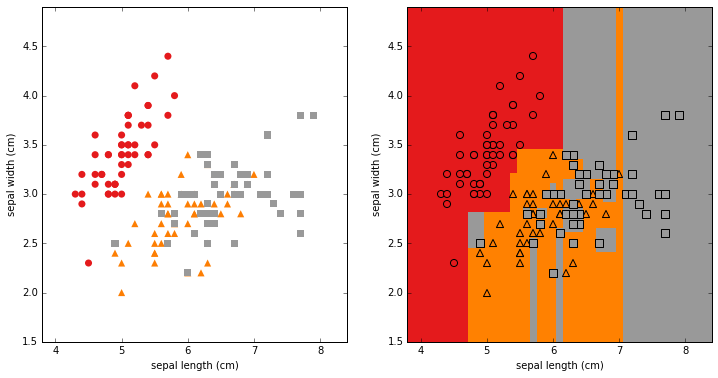

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the training points
for i in range(n_classes):
    inds = (Y==i)
    ax1.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=plt.cm.Set1,marker=md[i],s=50)


# Plot the classifier with the training points on top
ax2.pcolormesh(xx, yy, Z, cmap=cm)
for i in range(n_classes):
    inds = (Y==i)
    ax2.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=cm,marker=md[i],s=50,edgecolor='k')

# Label the axes and remove the ticks
for ax in (ax1,ax2):
    ax.set_xlabel(iris['feature_names'][0])
    ax.set_ylabel(iris['feature_names'][1])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max());

So this model has higher accuracy on the training set since it creates smaller niches and separated areas of different classes. However, this illustrates the danger of overfitting the model; further test sets will likely have poorer performance.

Like logistic regression, you can extract both discrete predictions and probabilities for each class:

In [9]:
# Just the discrete answer
data = np.array([width,length]).reshape(1,-1)
pred_class = tree_classifier.predict(data)[0]
target_name = iris['target_names'][pred_class]
print "Overall predicted class of the new flower is {0:}.\n".format(target_name)

# Probabilities for all the classes
pred_probs = tree_classifier.predict_proba(data)
for name,prob in zip(iris['target_names'],pred_probs[0]):
    print "\tProbability of class {0:12} is {1:.2f}%.".format(name,prob*100.)

Overall predicted class of the new flower is setosa.

	Probability of class setosa       is 100.00%.
	Probability of class versicolor   is 0.00%.
	Probability of class virginica    is 0.00%.


How could we not overfit? Maybe try trees with different depths. 

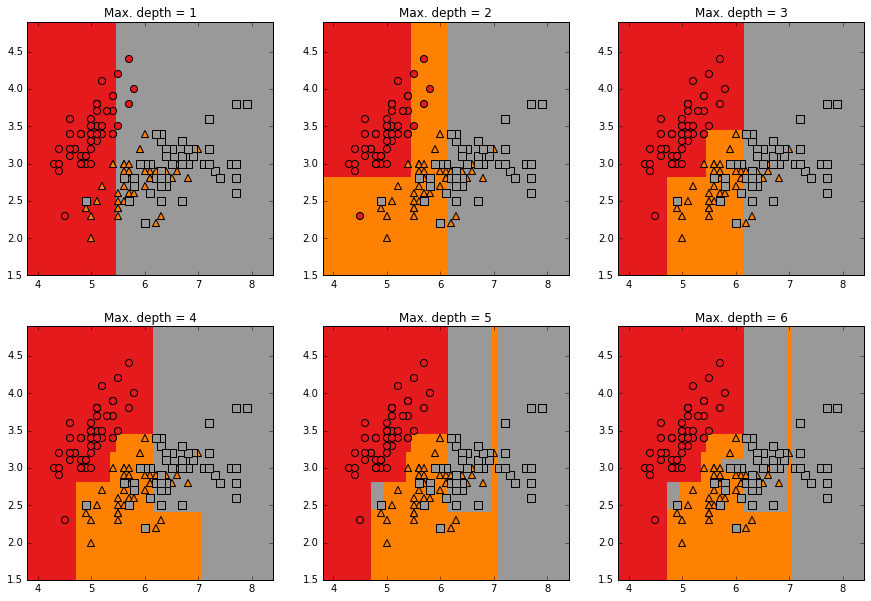

In [10]:
fig,axarr = plt.subplots(2,3,figsize=(15,10))
for depth,ax in zip(range(1,7),axarr.ravel()):
    tree_depthlim = tree.DecisionTreeClassifier(max_depth=depth)
    tree_depthlim.fit(X,Y)

    # Evaluate the classifier at every point in the gricdb
    Z = tree_depthlim.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot the classifier with the training points on top
    ax.pcolormesh(xx, yy, Z, cmap=cm)
    for i in range(n_classes):
        inds = (Y==i)
        ax.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
                   cmap=cm,marker=md[i],s=50,edgecolor='k')

    # Label the axes and remove the ticks
    ax.set_title('Max. depth = {0}'.format(depth))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max());

### Random forest

Random forest (RF) is an example of an **ensemble method** of classification; this takes many individual estimators that each have some element of randomness built into them, and then combines the individual results to reduce the total variance (although potentially with a small increase in bias). 

Random forests are built on individual decision trees. For the construction of the classifier in each tree, rather than picking the *best* split among all features at each node in the tree, the algorithm will pick the best split for a *random* subset of the features and then continue constructing the classifier. This means that all the trees will have slightly different classifications even based on identical training sets. The scikit-learn implementation of RF combines the classifiers by averaging the probabilistic prediction in each tree. 

Advantages:

* reduces variance in the model
* fast and scalable
* few parameters to tune (max depth, number of features, nature of randomness)

Disadvantages:

* slightly increases bias, especially for non-balanced datasets
* must be rebuilt if new features or training data are added

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=10)
rf_classifier.fit(X,Y)

# Evaluate the classifier at every point in the gricdb
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the output so that it can be overplotted on our grid
Z = Z.reshape(xx.shape)

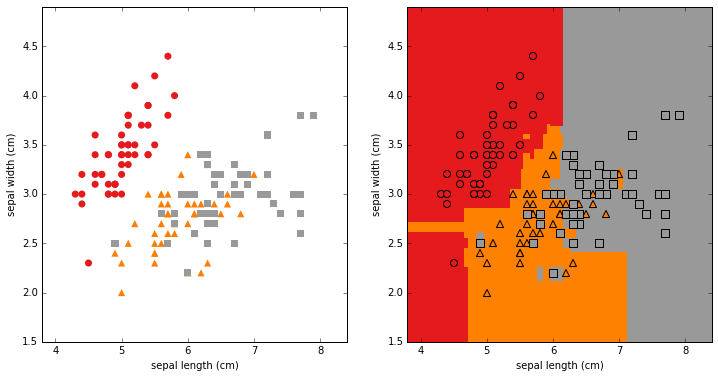

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the training points
for i in range(n_classes):
    inds = (Y==i)
    ax1.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=plt.cm.Set1,marker=md[i],s=50)


# Plot the classifier with the training points on top
ax2.pcolormesh(xx, yy, Z, cmap=cm)
for i in range(n_classes):
    inds = (Y==i)
    ax2.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=cm,marker=md[i],s=50,edgecolor='k')

# Label the axes and remove the ticks
for ax in (ax1,ax2):
    ax.set_xlabel(iris['feature_names'][0])
    ax.set_ylabel(iris['feature_names'][1])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max());

### Support vector classification

Support vector machines are another class of supervised learning methods. They rely on finding the weights necessary to create a set of hypervectors that separate the classes in a set. Like decision trees, they can be used for both classification and regression.

Advantages:

* work in high-dimensional spaces
* can be used even if $\mathcal{N}>n$ (number of dimensions are greater than number of samples)
* memory efficient
* can tune the kernel that controls decision function

Disadvantages:

* must tune the kernel that controls the decision function
* many more parameters that can potentially be set
* no direct probability estimates

The heart of an SVC is the kernel; this "mathematical trick" is what allows the algorithm to efficiently map coordinates into feature space by only computing the inner product on pairs of images, rather than a complete coordinate transformation. The shape of the kernel also determines the available shapes for the discriminating hyperplances. In scikit-learn, there are four precompiled kernels available (you can also define your own):

* linear
* polynomial
* rbf ("radial basis function"; **default**)
* sigmoid

In [13]:
from sklearn import svm

svm_classifier = svm.SVC()
svm_classifier.fit(X,Y)

# Evaluate the classifier at every point in the gricdb
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the output so that it can be overplotted on our grid
Z = Z.reshape(xx.shape)

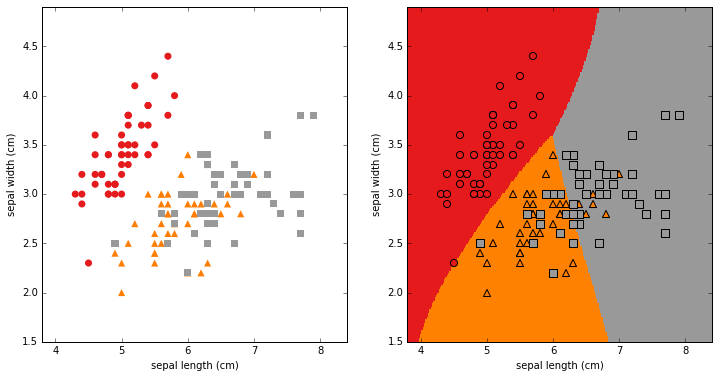

In [14]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the training points
for i in range(n_classes):
    inds = (Y==i)
    ax1.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=plt.cm.Set1,marker=md[i],s=50)


# Plot the classifier with the training points on top
ax2.pcolormesh(xx, yy, Z, cmap=cm)
for i in range(n_classes):
    inds = (Y==i)
    ax2.scatter(X[inds,0],X[inds,1],c=cm(int(i/float(n_classes-1) * 255)),
               cmap=cm,marker=md[i],s=50,edgecolor='k')

# Label the axes and remove the ticks
for ax in (ax1,ax2):
    ax.set_xlabel(iris['feature_names'][0])
    ax.set_ylabel(iris['feature_names'][1])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max());

In [15]:
# Just the discrete answer
data = np.array([width,length]).reshape(1,-1)
pred_class = svm_classifier.predict(data)[0]
target_name = iris['target_names'][pred_class]
print "Overall predicted class of the new flower is {0:}.\n".format(target_name)

Overall predicted class of the new flower is virginica.



## Conclusions

So what has this shown? Hopefully it's a practical introduction to the most basic concepts on the theory and implementation of several of the most widely-used classification algorithms in machine learning. I've left out several well-known ones, all of which have good implementations in scikit-learn; these include Naive Bayes, nearest neighbors, and discriminant analysis. More advanced methods include deep learning techniques like neural networks. 

One of the big things that this example didn't look at was how to choose between them. While I've listed some advantages and disadvantages that may initially steer you in certain directions, if you have sufficient data, you should be trying lots of different ones and evaluating their performance. This should be done with a proper split on test/training data and then evaluating accuracy with something like a ROC curve. But in addition to that, there's a massive need to **plot and examine** your data (if it's higher-dimensional, then do so in various projections or reduce the dimensionality) and evaluate whether your classifications make sense. It's key for avoiding things like overfitting or badly-tuned parameters that can skew the prediction/classification you're trying to do. 

Massive thanks to the team behind [scikit-learn](http://scikit-learn.org/stable/about.html##citing-scikit-learn) for this outstanding implementation.